This notebook is to generate Figure 1 in the manuscript, illustrating the importance of multiple comparison in microbiome analysis.

In [1]:
import matplotlib.pyplot as plt
from gneiss.util import  block_diagonal
import pandas as pd
import numpy as np
from scipy.stats import kruskal
%matplotlib inline

In [2]:
# simulation settings
n_bacteria = 1000
n_samples = 100
n_groups = 2
K = n_samples//n_groups
M = block_diagonal(ncols=n_bacteria, nrows=n_samples, nblocks=n_groups)
N = np.random.rand(n_samples, n_bacteria)

In [3]:
def sparsify(X, level=5):
    X_ = ((X * level) < 1)
    return np.multiply(X, X_)

In [4]:
df_M = pd.DataFrame(sparsify(M))
df_N = pd.DataFrame(sparsify(N))
groups = pd.Series(['Sick'] * K + ['Healthy'] * K)

In [5]:
def multiple_kruskalwallis(X, groups):
    cats = list(groups.value_counts().index)
    stats = []
    for i in X.columns:
        stats.append(kruskal(*[X.loc[groups==c, i] for c in cats]).pvalue)
    return pd.Series(stats, index=X.columns)

In [6]:
Mstats = multiple_kruskalwallis(df_M, groups)
Nstats = multiple_kruskalwallis(df_N, groups)

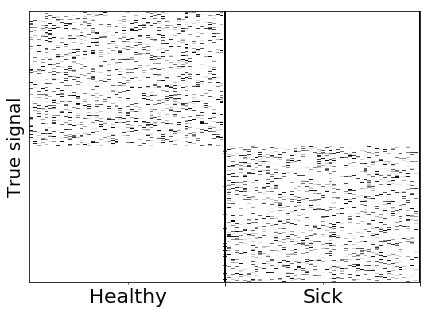

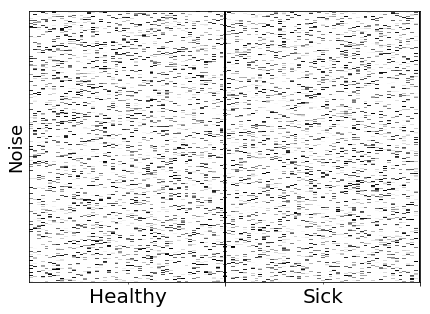

In [7]:
# Heatmaps showing two different simulation settings
fig, ax00 = plt.subplots(figsize=(7, 5))
_ = ax00.imshow(sparsify(M).T, aspect='auto', interpolation='nearest', cmap='Greys') 
_ = ax00.set_xticks([])
_ = ax00.set_yticks([])
ax00.set_ylabel('True signal', fontsize=18)

ticks = groups.value_counts().sort_index().cumsum()
midpoints = ticks - (ticks - np.array([0] + list(ticks.values[:-1]))) / 2.0
ax00.set_xticks(ticks.values, minor=False)
ax00.set_xticks(midpoints, minor=True)

ax00.set_xticklabels(ticks.index, fontsize=20, minor=True)
ax00.set_xticklabels([], fontsize=20, minor=False)
ax00.grid(which='major', color='k', linestyle='-', linewidth=2)
fig.savefig('../figures/figure1a.pdf', dpi=300)

fig, ax10 = plt.subplots(figsize=(7, 5))
_ = ax10.imshow(sparsify(N).T, aspect='auto', interpolation='nearest', cmap='Greys') 
_ = ax10.set_xticks([])
_ = ax10.set_yticks([])
ax10.set_ylabel('Noise', fontsize=18)

ticks = groups.value_counts().sort_index().cumsum()
midpoints = ticks - (ticks - np.array([0] + list(ticks.values[:-1]))) / 2.0
ax10.set_xticks(ticks.values, minor=False)
ax10.set_xticks(midpoints, minor=True)

ax10.set_xticklabels(ticks.index, fontsize=20, minor=True)
ax10.set_xticklabels([], fontsize=20, minor=False)
ax10.grid(which='major', color='k', linestyle='-', linewidth=2)
fig.savefig('../figures/figure1c.pdf', dpi=300)

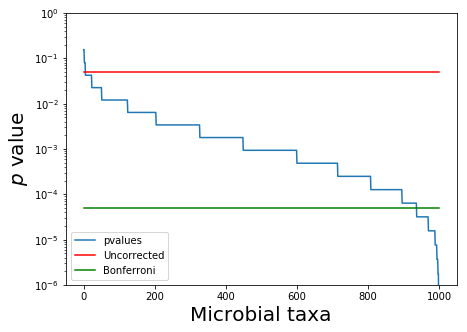

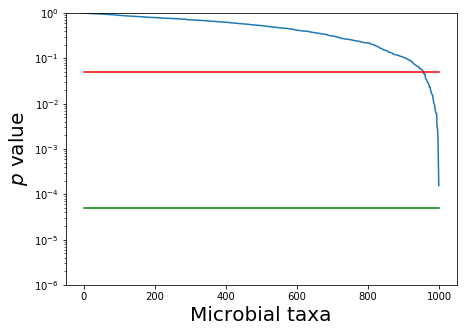

In [8]:
# Figures showing corresponding p-values in two simulation settings
fig, ax01 = plt.subplots(figsize=(7, 5))
_ = ax01.plot(np.sort(Mstats)[::-1], label='pvalues')
ax01.set_ylabel('${\it p}$ value', fontsize=20)
ax01.set_yscale('log')
ax01.set_xlabel('Microbial taxa', fontsize=20)
alpha = 0.05
ax01.plot(np.arange(1000), [alpha] * 1000, '-r', label='Uncorrected')
ax01.plot(np.arange(1000), [alpha / 1000] * 1000, '-g', label='Bonferroni')
ax01.legend(loc=3)
ax01.set_ylim([10**-6, 10**0])
fig.savefig('../figures/figure1b.pdf', dpi=300)

fig, ax11 = plt.subplots(figsize=(7, 5))
_ = ax11.plot(np.sort(Nstats)[::-1])
ax11.set_ylabel('${\it p}$ value', fontsize=20)
ax11.set_yscale('log')
ax11.set_xlabel('Microbial taxa', fontsize=20)
ax11.plot(np.arange(1000), [alpha] * 1000, '-r', label='Uncorrected')
ax11.plot(np.arange(1000), [alpha / 1000] * 1000, '-g', label='Bonferroni')
ax11.set_ylim([10**-6, 10**0])
fig.savefig('../figures/figure1d.pdf', dpi=300)